In [109]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import math

In [38]:
msft = yf.Ticker("MSFT")

In [39]:
df = msft.history(period="max")

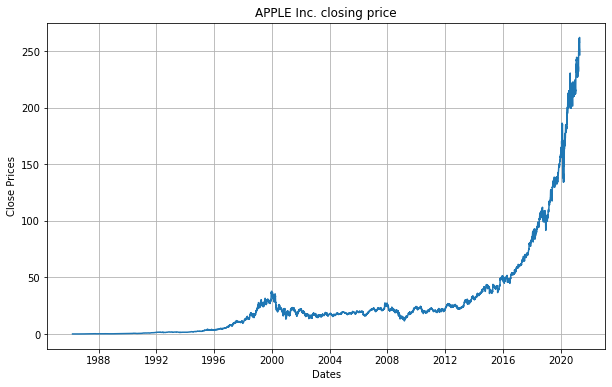

In [40]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df.Close)
plt.title('APPLE Inc. closing price')
plt.show()

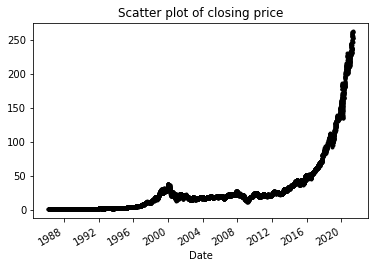

In [41]:
# Scatter Plot
df_close = df.Close
#print(type(df_close))
#df_close=pd.to_datetime(df_close['Date'])
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

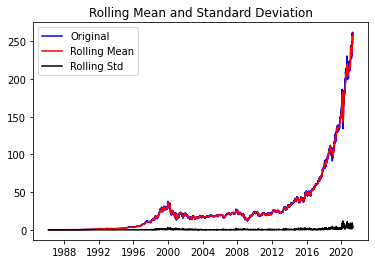

Results of dickey fuller test
Test Statistics                   9.561056
p-value                           1.000000
No. of lags used                 37.000000
Number of observations used    8820.000000
critical value (1%)              -3.431092
critical value (5%)              -2.861868
critical value (10%)             -2.566944
dtype: float64


In [42]:
#Null Hypothesis check
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

<Figure size 432x288 with 0 Axes>

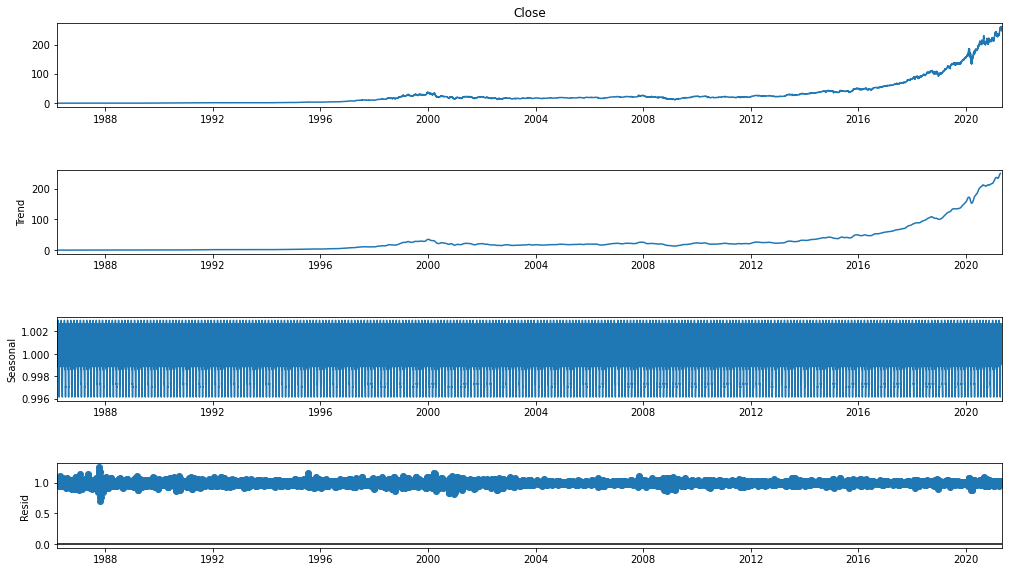

In [43]:
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


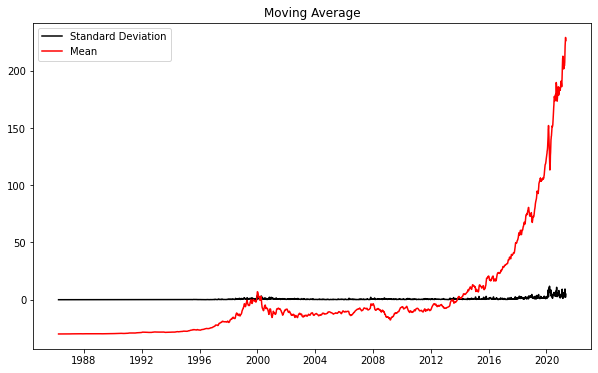

In [167]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = df_close
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

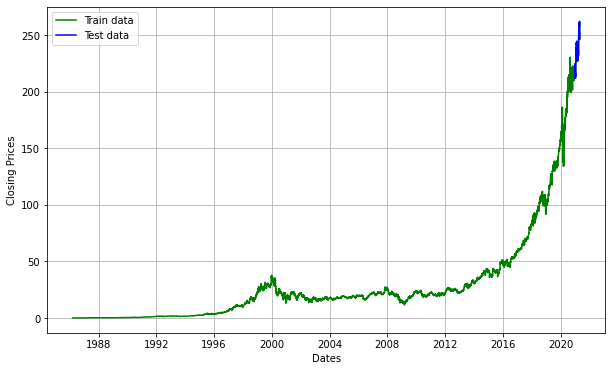

In [89]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.99):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [165]:
#Auto Arima model ti find out coeff p,d,q for Arima
model = pm.auto_arima(df.Close, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25057.966, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25566.014, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25058.081, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25106.284, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25570.556, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25054.505, Time=3.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=25057.209, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=24967.545, Time=3.53 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=25043.764, Time=0.84 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=24772.645, Time=7.72 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25039.855, Time=2.74 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25010.039, Time=7.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=24988.639, Time=5.81 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=24781.016, Time=3.12 sec

Best model:  ARIMA

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


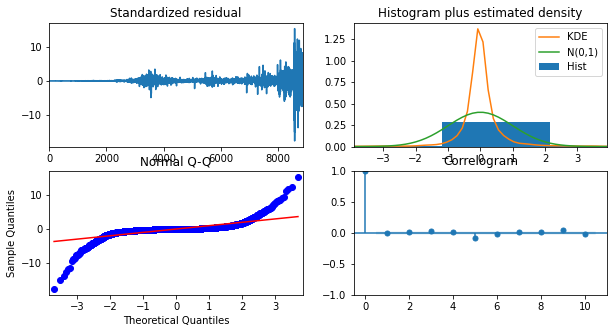

In [135]:
model.plot_diagnostics(figsize=(10,5))
plt.show()

In [171]:
#model = ARIMA(df_log, order=(3,1,0))  
#fitted = model.fit(disp=-1)  
#print(fitted.summary())

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
No handles with labels found to put in legend.


Date
2021-03-22    230.232942
2021-03-23    234.329720
2021-03-24    237.362550
2021-03-25    236.295937
2021-03-26    233.144335
2021-03-29    235.332775
2021-03-30    235.548795
2021-03-31    232.858562
2021-04-01    234.704507
2021-04-05    240.712309
2021-04-06    247.821956
2021-04-07    248.596839
2021-04-08    249.686402
2021-04-09    252.493780
2021-04-12    255.449705
2021-04-13    256.141917
2021-04-14    258.033709
2021-04-15    256.379585
2021-04-16    258.639657
2021-04-19    260.467119
2021-04-20    259.450068
2021-04-21    258.406136
2021-04-22    259.968329
2021-04-23    258.050712
2021-04-26    260.248782
2021-04-27    261.446273
2021-04-28    262.091506
2021-04-29    256.378024
2021-04-30    252.842888
2021-05-03    251.934763
2021-05-04    251.875836
dtype: float64
MSE: 13.023834198413859
MAE: 2.896392037858533
RMSE: 3.6088549705431303
R-squared score:  0.8660403800341665


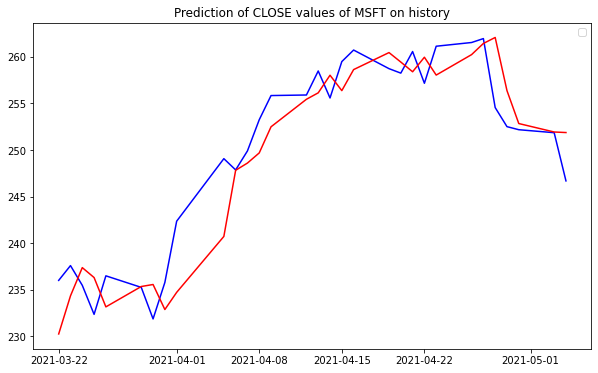

In [169]:
# Finding predicted values for last 31 days and plotting graph between predicted values and test actual values 
# of last 31 days
from math import sqrt
from matplotlib import pyplot

size = int(len(df.Close))-31
train, test = df.Close[0:size], df.Close[size:len(df.Close)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
series = pd.Series(predictions,index=test.index)
print(series)

# evaluate forecasts

# report performance

mse = mean_squared_error(test, series)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, series)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, series))
print('RMSE: '+str(rmse))
r2 = r2_score(test, series, sample_weight=None, multioutput='uniform_average')
print('R-squared score: ', r2)


pyplot.figure(figsize=(10,6))
pyplot.title("Prediction of CLOSE values of MSFT on history")
pyplot.plot(test,color='blue')
pyplot.legend(loc='best')
pyplot.plot(series ,color='red')
pyplot.show()

Todays Value :
Date
2021-05-04    246.679993
Name: Close, dtype: float64
Predicted values for next 3 days
2021-05-05    244.581229
2021-05-06    244.663610
2021-05-07    244.353085
dtype: float64


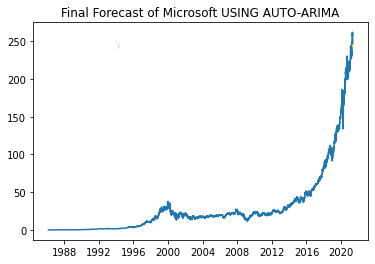

In [164]:
from datetime import timedelta  
# Forecast
n_periods = 30
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Close)-30, len(df.Close))

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

#print(fc_series)
pred_values=[]
indexes=[]
current_date=df.index[-1]

#Transaforming Data to Dates
for index, value in fc_series.items():
    #print(f"Index : {index}, Value : {value}")
    current_date=current_date+ timedelta(days=1)
    indexes.append(current_date)
    pred_values.append(value)

print(f"Todays Value :")
print(df.Close.tail(1))
print(f"Predicted values for next {n_periods} days")    
new_fc_series = pd.Series(pred_values,index=indexes)
print(new_fc_series)

# Plot
plt.plot(df.Close)
plt.plot(new_fc_series, color='yellow')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Microsoft USING AUTO-ARIMA")
plt.show()

In [ ]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df.Close, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=24,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

2021-06-01    248.606717
2021-07-01    250.703982
2021-08-01    252.795726
2021-09-01    248.717662
2021-10-01    250.385974
2021-11-01    253.360151
2021-12-01    254.635315
2022-01-01    251.037834
2022-02-01    249.673522
2022-03-01    250.200019
2022-04-01    250.530949
2022-05-01    248.292835
2022-06-01    249.121945
2022-07-01    252.106077
2022-08-01    255.889917
2022-09-01    252.967255
2022-10-01    255.297862
2022-11-01    257.643842
2022-12-01    259.107263
2023-01-01    255.790854
2023-02-01    255.649335
2023-03-01    254.597338
2023-04-01    256.031309
2023-05-01    254.760858
Freq: MS, dtype: float64


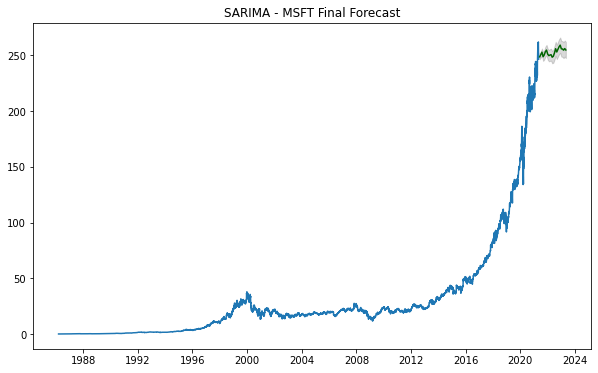

In [71]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.Close.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

#Transaforming Data to Dates
print(fitted_series)

# Plot
plt.plot(df.Close)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - MSFT Final Forecast")
plt.show()